In [1]:
import sys
sys.path.insert(1, '../')  # to load from any submodule in the repo

from utils import reader
from utils import dpcrUtils as utils
from utils import generator
from utils import reconstructor
from models import models

import torch
import numpy as np
import scipy as sp
import matplotlib
import matplotlib.pyplot as plt
import time
from mpl_toolkits.mplot3d import Axes3D
import itertools
import _pickle as cPickle
from torchviz import make_dot

device = utils.getDevice()
print ("Device:", device)
    
torch.no_grad()

seed_file = open('../utils/seed.txt', "r")
seed = int(seed_file.read())
seed_file.close()

print ("Using Seed:", seed)
    
torch.manual_seed(seed)
np.random.seed(seed)

Using 1 CUDA devices (GeForce GTX 1070)
Device: cuda
Using Seed: 34897567


In [64]:
corrector = None

#predictor = models.loadModel('../training/checkpoints/predictor_multi_abc_cnet_mish_radam_sd/2020-12-30_201748/predictor_checkpoints.t7', device=device)
#detector = models.loadModel('../hpc/results/detector_multi_simple_shapes_cnet_mish_radam_sd/2020-12-15_224339/detector_checkpoints.t7', device=device)

#predictor = models.loadModel('../hpc/results/predictor_multi_simple_shapes_cnet_mish_radam_sd/2020-12-19_062318/predictor_checkpoints.t7', device=device)
#detector = models.loadModel('../hpc/results/detector_multi_simple_shapes_cnet_mish_radam_sd/2020-12-15_224339/detector_checkpoints.t7', device=device)

#predictor = models.loadModel('../hpc/results/predictor_multi_scans_cnet_mish_radam_sd/2020-12-19_064632/predictor_checkpoints.t7', device=device)
#detector = models.loadModel('../hpc/results/detector_multi_scans_cnet_mish_radam_sd/2020-12-19_041509/detector_checkpoints.t7', device=device)

#predictor = models.loadModel('../hpc/results/predictor_multi_faces_cnet_mish_radam_sd/2020-12-15_224134/predictor_checkpoints.t7', device=device)
#detector = models.loadModel('../hpc/results/detector_multi_faces_cnet_mish_radam_sd/2020-12-09_074025/detector_checkpoints.t7', device=device)
#corrector = models.loadModel('../hpc/results/corrector_multi_faces_cnet_mish_radam/2021-01-02_024609/corrector_checkpoints.t7', device=device)

#predictor = models.loadModel('../hpc/results/predictor_multi_cuboids_cnet_mish_radam_sd/2020-12-19_062203/predictor_checkpoints.t7', device=device)
#detector = models.loadModel('../hpc/results/detector_multi_cuboids_cnet_mish_radam_sd/2020-12-15_224131/detector_checkpoints.t7', device=device)

#predictor = models.loadModel('../hpc/results/predictor_single_armadillo_cnet_mish_radam_sd/2020-12-15_224123/predictor_checkpoints.t7', device=device)
#detector = models.loadModel('../hpc/results/detector_single_armadillo_cnet_mish_radam_sd/2020-12-15_224123/detector_checkpoints.t7', device=device)

#predictor = models.loadModel('../hpc/results/predictor_single_bunny_cnet_mish_radam_sd/2020-12-06_104726/predictor_checkpoints.t7', device=device)
predictor = models.loadModel('../hpc/results/predictor_single_bunny_cnet_mish_radam/2020-12-31_171657/predictor_checkpoints.t7', device=device)
detector = models.loadModel('../hpc/results/detector_single_bunny_cnet_mish_radam_sd/2020-12-08_110946/detector_checkpoints.t7', device=device)
corrector = models.loadModel('../hpc/results/corrector_single_bunny_cnet_mish_radam/2021-01-02_030713/corrector_checkpoints.t7', device=device)


#corrector = models.loadModel('../hpc/results/corrector_01_single_bunny_cnet_mish_radam_sd/2020-12-12_040206/corrector_checkpoints.t7', device=device)
#corrector = models.loadModel('../hpc/results/corrector_02_single_bunny_cnet_mish_radam_sd/2020-12-12_083939/corrector_checkpoints.t7', device=device)
#corrector = models.loadModel('../hpc/results/corrector_05_single_bunny_cnet_mish_radam_sd/2020-12-15_234102/corrector_checkpoints.t7', device=device)

#predictor = models.loadModel('../hpc/results/predictor_single_cube_cnet_mish_radam_sd/2020-12-06_164033/predictor_checkpoints.t7', device=device)
#detector = models.loadModel('../hpc/results/detector_single_cube_cnet_mish_radam_sd/2020-12-06_103922/detector_checkpoints.t7', device=device, checkpoint=30)
#corrector = None

#predictor = models.loadModel('../hpc/results/predictor_single_tetrahedron_cnet_mish_radam_sd/2020-12-07_155445/predictor_checkpoints.t7', device=device)
#detector = models.loadModel('../hpc/results/detector_single_tetrahedron_cnet_mish_radam_sd/2020-12-07_094422/detector_checkpoints.t7', device=device, checkpoint=30)
#corrector = None


torch.cuda.empty_cache()

print ("Load complete!")

Load complete!


In [65]:
import os

start = time.time()

dataset = 'single_bunny'

valModels = generator.getPaths()[dataset]['val']
model_path = '../' + valModels[np.random.randint(len(valModels))]
print (model_path)
model, _ = reader.readOBJ(model_path)

if False:
    path = 'D:\\Data\\ABC_reduced\\validation\\' + 'abc_0000_obj_v00 _06656.obj'

    paths = [0]
    val_dir = 'D:\\Data\\ABC_reduced\\validation\\'
    for file in os.listdir(val_dir):
        if file.endswith(".obj"):
            paths.append(os.path.join(val_dir, file))

    i = np.random.randint(len(val_dir))

    path = paths[i]
    print("model: ", path)

    model, _ = reader.readOBJ(path)

#model, _ = reader.readOBJ('../data/multi_model_training/simple_shapes/ellipsoid_03.obj')
#model, _ = reader.readOBJ('../data/single_model_training/simple_shapes/cube.obj')
#model, _ = reader.readOBJ('../data/single_model_training/bunny/bunny.obj')
#model, _ = reader.readOBJ('../data/multi_model_training/scans/amb_00.obj')
#model, _ = reader.readOBJ('../data/single_model_training/bunny/tests/bunny_perspective.obj')
#model, _ = reader.readOBJ('../data/multi_model_training/faces/face_12_clean.obj')
#model, _ = reader.readOBJ('../data/multi_model_training/faces/test/face_11_top_cut.obj')

model = np.array(model).astype(float)

pts = torch.from_numpy(model).float().to(device)

# mean centering & scaling
pts = pts - torch.mean(pts, dim = 0)
pts = pts / torch.max(torch.abs(pts))

knn = utils.knn(pts, 6)

../data/single_model_training/bunny/bunny.obj


In [66]:
#val_data = generator.getSampleList(knn, 1, iteration_range = (0,0), hidden_range = (0, 0))
val_data = generator.getSampleList(knn, 100, iteration_range = (9,12), hidden_range = (16, 20))

neighbors_dirs = pts[knn] - pts[:, None, :]

torch.cuda.empty_cache()

print ("Generated %d Test Models" % len(val_data))
print ("Total Time:", time.time() - start)

Generated 1109 Test Models
Total Time: 2.712827444076538


In [81]:
sample_id = np.random.randint(len(val_data))

pts_ids = val_data[sample_id][:,0]
edge_mask = val_data[sample_id][:,1].clone().detach().cpu().numpy()

sample = pts[pts_ids]

In [82]:
t = 0.99

e = detector(sample.unsqueeze(0).transpose(1,2).to(device)).squeeze(0).transpose(0,1)

e = torch.exp(e)
e /= torch.sum(e, dim=1)[:, None]
e[:,0] += t 

e = e.argmax(dim=1).cpu().numpy()

torch.cuda.empty_cache()

print ("predicted edge points:", np.sum(e))
print ("actual edge points:", np.sum(edge_mask))

predicted edge points: 443
actual edge points: 463


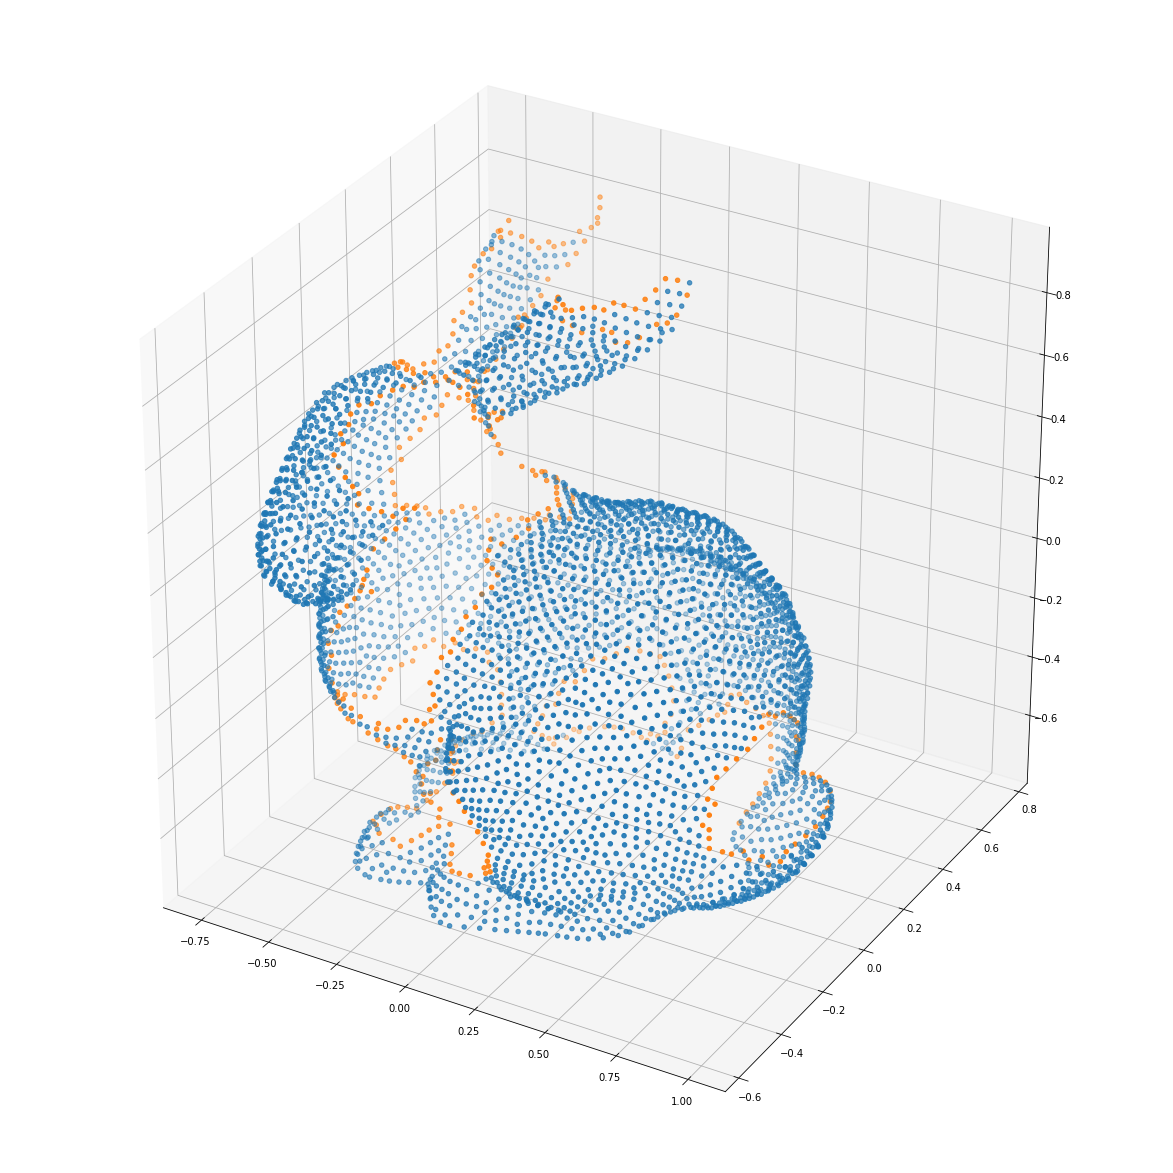

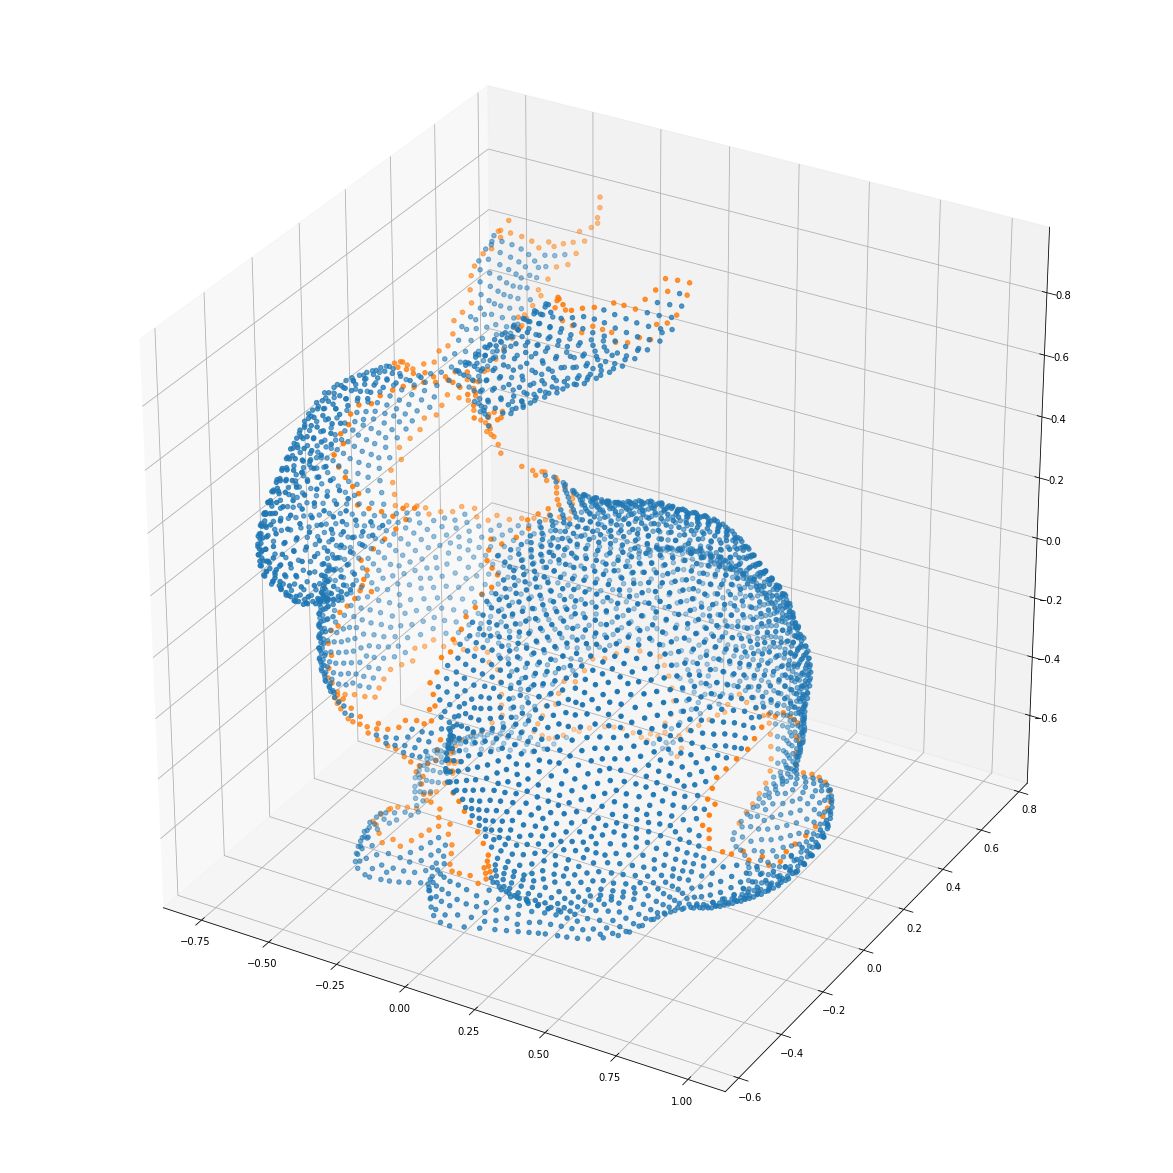

In [83]:
fig = plt.figure(figsize=(16,16))
ax = Axes3D(fig)

numpy_sample = sample.clone().detach().cpu().numpy()

ax.scatter(numpy_sample[e==0,0], numpy_sample[e==0,1], numpy_sample[e==0,2])
ax.scatter(numpy_sample[e==1,0], numpy_sample[e==1,1], numpy_sample[e==1,2])

plt.show()

fig = plt.figure(figsize=(16,16))
ax = Axes3D(fig)

numpy_sample = sample.clone().detach().cpu().numpy()

ax.scatter(numpy_sample[edge_mask==0,0], numpy_sample[edge_mask==0,1], numpy_sample[edge_mask==0,2])
ax.scatter(numpy_sample[edge_mask==1,0], numpy_sample[edge_mask==1,1], numpy_sample[edge_mask==1,2])

plt.show()

In [84]:
torch.cuda.empty_cache()

start = time.time()
running_data_corrected,new_points_list_corrected = reconstructor.reconstruct(sample, predictor, detector, corrector=corrector, corrector_stage=5, max_iters=10, t=0.9, verbose=True)
end = time.time()
print ("Time corrector: %.3fs" % (end-start))

start = time.time()
running_data, new_points_list = reconstructor.reconstruct(sample, predictor, detector, corrector=None, max_iters=10, t=0.99)
end = time.time()
print ("Time w/o corrector: %.3fs" % (end-start))


Iteration 1:

New candidates:  2796
Iterations left:  5
corrections sum: 2.673123836517333984375000000000
Iterations left:  5
corrections sum: 1.724444627761840820312500000000
Iterations left:  5
corrections sum: 1.353046774864196777343750000000
Iterations left:  5
corrections sum: 1.143761634826660156250000000000
Iterations left:  5
corrections sum: 1.116252183914184570312500000000
breaking correction loop after 5 --> correction change: 0.02405
New Pts: 303
New Size: 4429

Iteration 2:

New candidates:  2352
Iterations left:  5
corrections sum: 3.633175373077392578125000000000
Iterations left:  5
corrections sum: 2.638441562652587890625000000000
Iterations left:  5
corrections sum: 2.229980468750000000000000000000
Iterations left:  5
corrections sum: 2.008419990539550781250000000000
breaking correction loop after 4 --> correction change: 0.09936
New Pts: 222
New Size: 4639

Iteration 3:

New candidates:  2010
Iterations left:  5
corrections sum: 6.295798301696777343750000000000
Itera

In [85]:
colors = sample.shape[0] * [200 * np.ones(3, dtype=np.int)]
colors_corrected = sample.shape[0] * [200 * np.ones(3, dtype=np.int)]

data = sample.cpu().numpy().tolist()
data_corrected = sample.cpu().numpy().tolist()

new_points_list_np = [pts.cpu().numpy() for pts in new_points_list]
new_points_list_np_corrected = [pts.cpu().numpy() for pts in new_points_list_corrected]


input_colors = 1 * colors
for (i, em) in enumerate(e):
    if (em == 1):
        input_colors[i] = np.array([255,140,73])

utils.exportPLY(np.array(data), np.array(input_colors).astype(np.int), "D:\\Github\\Repos\\dpcr\\evaluation", name = 'input_model_bn')

for i in range(len(new_points_list_np)):
    for k in range(new_points_list_np[i].shape[0]):
        data.append(new_points_list_np[i][k])
        colors.append(np.array(matplotlib.cm.get_cmap('viridis')((i+1) / len(new_points_list_np)))[:3] * 255)

for i in range(len(new_points_list_np_corrected)):
    for k in range(new_points_list_np_corrected[i].shape[0]):
        data_corrected.append(new_points_list_np_corrected[i][k])
        colors_corrected.append(np.array(matplotlib.cm.get_cmap('viridis')((i+1) / len(new_points_list_np_corrected)))[:3] * 255)

data = np.array(data)
data_corrected = np.array(data_corrected)

colors = np.array(colors).astype(np.int)
colors_corrected = np.array(colors_corrected).astype(np.int)
        
print ("default shape:", data.shape)
print ("corrected shape:", data_corrected.shape)

utils.exportPLY(data, colors, "D:\\Github\\Repos\\dpcr\\evaluation", name = 'output_model')
utils.exportPLY(data_corrected, colors_corrected, "D:\\Github\\Repos\\dpcr\\evaluation", name = 'output_model_corrected')

default shape: (5980, 3)
corrected shape: (5047, 3)
